# Exploratory Data Analysis :))))))))))))))))))))))))

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import json
from subprocess import check_output
# from wordcloud import WordCloud, STOPWORDS

### Read in data

In [2]:
us_comments_df = pd.read_csv("./data_scraper/kaggle/UScomments.csv", error_bad_lines=False)
gb_comments_df = pd.read_csv("./data_scraper/kaggle/GBcomments.csv", error_bad_lines=False)
us_videos_df = pd.read_csv("./data_scraper/kaggle/USvideos.csv", error_bad_lines=False)
gb_videos_df = pd.read_csv("./data_scraper/kaggle/GBvideos.csv", error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\legin\Miniconda3\envs\nlp-ds\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, s

In [3]:
with open('./data_scraper/kaggle/US_category_id.json') as json_file:
    us_json = json.load(json_file)
with open('./data_scraper/kaggle/GB_category_id.json') as json_file:
    gb_json = json.load(json_file)

### Lets combine all the comments into comments_df

In [4]:
comments_df = pd.concat([us_comments_df, gb_comments_df]).reset_index()

In [5]:
comments_df.describe()

,index
count,1.409852e+06
mean,3.525923e+05
std,2.037193e+05
min,0.000000e+00
25%,1.762310e+05
50%,3.524625e+05
75%,5.286940e+05
max,7.184510e+05


In [6]:
comments_df.head()

,index,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0


### Exploring category json

First, lets create a mapping from category id to category string for both US and GB to see if there is any discrepancy (i.e. same category id but different category name)

In [7]:
# Getting the id -> name mappings for us and gb
us_id_to_category = {}
for i in us_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    us_id_to_category[id] = category
gb_id_to_category = {}
for i in gb_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    gb_id_to_category[id] = category

In [8]:
# Check for discrepancies (i.e. same category id but different category name)
flag = True
for k, v in us_id_to_category.items():
    if k in gb_id_to_category:
        if us_id_to_category[k] != gb_id_to_category[k]:
            flag = False
            print(f"category id {k} is different for us and gb: us - {us_id_to_category[k]}, gb - {gb_id_to_category[k]}")
if flag: print("No discrepancies")

No discrepancies


In [9]:
# Check for extra categories (i.e. does us or gb have category that the other does not?)
us_id_set = set(us_id_to_category.keys())
gb_id_set = set(gb_id_to_category.keys())

if len(us_id_set.difference(gb_id_set)):
    for i in us_id_set.difference(gb_id_set):
        print(f"us had category id {i} but gb does not")
if len(gb_id_set.difference(us_id_set)):
    for i in gb_id_set.difference(us_id_set):
        print(f"gb had category id {i} but us does not")

us had category id 29 but gb does not


Seems like there are no discrepancies, but there is no category id 29 for gb

In [10]:
us_id_to_category[29]

'Nonprofits & Activism'

### Lets combine all the videos into videos_df

In [11]:
videos_df = pd.concat([us_videos_df, gb_videos_df]).reset_index()

In [12]:
videos_df.describe()

,index,category_id,views,likes,dislikes,comment_total,date
count,15985.000000,15985.000000,1.598500e+04,1.598500e+04,15985.000000,15985.000000,15985.000000
mean,3995.750016,19.977979,1.024885e+06,3.667593e+04,1655.234032,4800.072443,16.091561
std,2307.308194,7.301495,2.638562e+06,1.007493e+05,9591.500385,23774.231115,7.677685
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000
25%,1998.000000,17.000000,1.034140e+05,2.268000e+03,69.000000,298.000000,11.100000
50%,3996.000000,23.000000,3.120620e+05,9.168000e+03,259.000000,1059.000000,16.100000
75%,5994.000000,25.000000,9.660010e+05,3.085400e+04,934.000000,3393.000000,21.100000
max,7992.000000,43.000000,5.896141e+07,2.289911e+06,318404.000000,813322.000000,30.090000


In [13]:
videos_df.head()

,index,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### Save combined comments and videos

In [18]:
comments_df.to_csv("comments.csv")
videos_df.to_csv("videos.csv")

### Okay lets actually start analyzing stuff

In [19]:
# Looking at some information of video data
print(videos_df.shape)
print(videos_df.nunique())

(15985, 12)
index              7993
video_id           3280
title              3341
channel_title      1704
category_id          16
tags               3046
views             15268
likes             11664
dislikes           3306
comment_total      5506
thumbnail_link     3280
date                 40
dtype: int64


In [20]:
# Check the dtypes, check for nulls
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 12 columns):
index             15985 non-null int64
video_id          15985 non-null object
title             15985 non-null object
channel_title     15985 non-null object
category_id       15985 non-null int64
tags              15985 non-null object
views             15985 non-null int64
likes             15985 non-null int64
dislikes          15985 non-null int64
comment_total     15985 non-null int64
thumbnail_link    15985 non-null object
date              15985 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 1.5+ MB


### Do view, like, dislike and comment counts have a normal distribution?

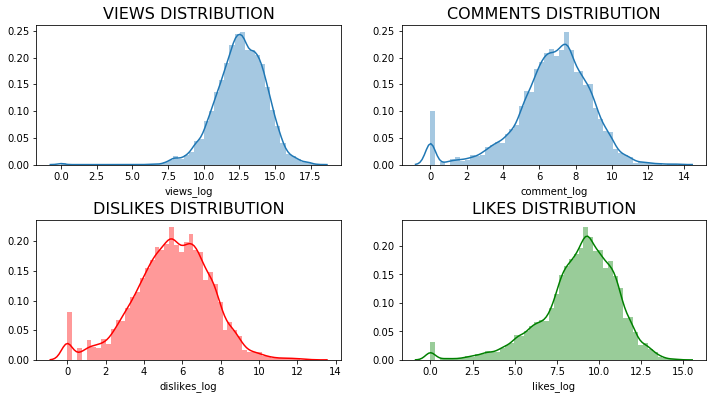

In [21]:
# Create log attributes
videos_df['likes_log'] = np.log(videos_df['likes'] + 1) # +1 for smoothing since log(0) is undefined
videos_df['views_log'] = np.log(videos_df['views'] + 1)
videos_df['dislikes_log'] = np.log(videos_df['dislikes'] + 1)
videos_df['comment_log'] = np.log(videos_df['comment_total'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(videos_df['views_log'])
g1.set_title("VIEWS DISTRIBUTION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(videos_df['likes_log'],color='green')
g2.set_title('LIKES DISTRIBUTION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(videos_df['dislikes_log'], color='r')
g3.set_title("DISLIKES DISTRIBUTION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(videos_df['comment_log'])
g4.set_title("COMMENTS DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

### Inspect the quantiles for views, likes, dislikes, comments

In [22]:
print("Views quantiles")
print(videos_df['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(videos_df['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(videos_df['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(videos_df['comment_total'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        3288.52
0.25      103414.00
0.50      312062.00
0.75      966001.00
0.99    11665030.20
Name: views, dtype: float64

Likes quantiles
0.01         1.00
0.25      2268.00
0.50      9168.00
0.75     30854.00
0.99    440874.32
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25       69.00
0.50      259.00
0.75      934.00
0.99    22047.32
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.0
0.25      298.0
0.50     1059.0
0.75     3393.0
0.99    53760.2
Name: comment_total, dtype: float64


### Create category_name attribute

In [23]:
videos_df['category_name'] = videos_df.apply(lambda row: us_id_to_category[row['category_id']], axis=1)

In [24]:
videos_df.head()

,index,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,likes_log,views_log,dislikes_log,comment_log,category_name
0,0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,12.676245,15.295757,8.688117,10.741730,Entertainment
1,1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,12.132717,15.877312,10.191670,0.000000,Science & Technology
2,2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,13.264901,15.581253,10.590994,12.047716,People & Blogs
3,3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,10.125671,14.787086,8.421343,9.459541,Science & Technology
4,4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,11.479027,13.970916,6.343880,8.804925,Comedy


### Plot video distribution by category in percentage

['News & Politics', 'Autos & Vehicles', 'Entertainment', 'Howto & Style', 'Sports', 'Gaming', 'Comedy', 'Nonprofits & Activism', 'Pets & Animals', 'Music', 'Film & Animation', 'People & Blogs', 'Science & Technology', 'Travel & Events', 'Shows', 'Education']
[5.761651548326556, 1.1448232718173288, 19.480763215514546, 12.593055989990615, 6.969033468877072, 2.089458867688458, 8.207694713794183, 0.1376290272130122, 1.213637785423835, 15.933687832342821, 4.823271817328746, 12.730685017203628, 4.848295276822021, 0.5880512980919612, 0.012511729746637473, 3.46574913981858]


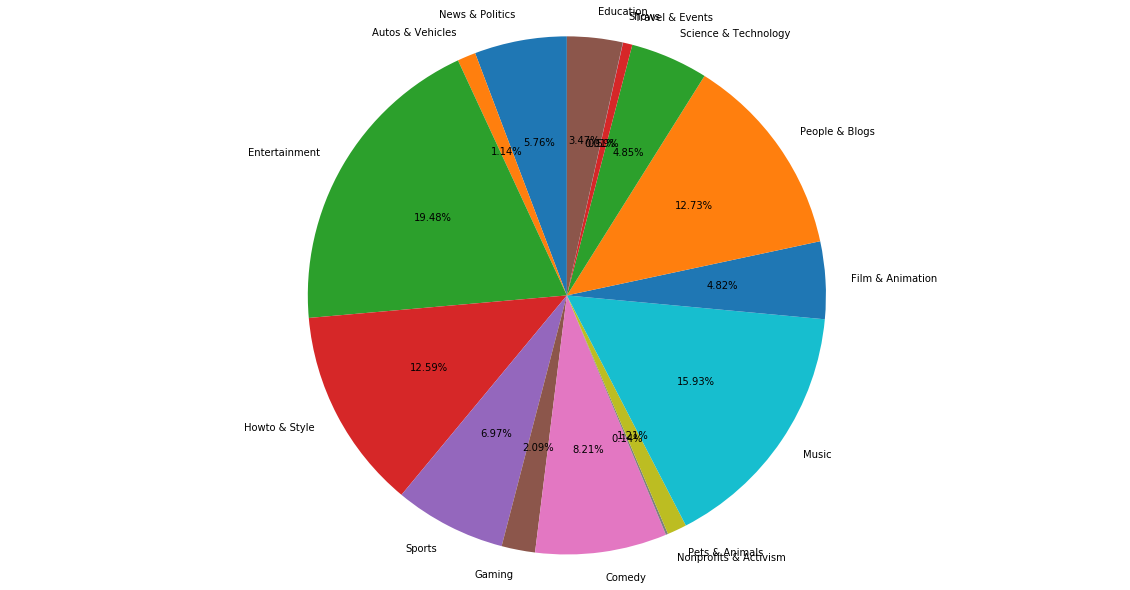

In [25]:
category_list = videos_df['category_name'].tolist()
category_list = list(set(category_list))
for i in category_list:
    if str(i) == 'nan':
        category_list.remove(i)
print (category_list)

totalnum = videos_df.shape[0]

number_of_videos=[]
for cat in category_list:
    tmp_df=videos_df.loc[videos_df['category_name']==cat]
    tmp_count=tmp_df.shape[0]
    number_of_videos.append(tmp_count*100/totalnum)

print (number_of_videos)

d={'category':category_list,'video percentage':number_of_videos}
tmp_df=pd.DataFrame(data=d)

fig1, ax1 = plt.subplots()
ax1.pie(number_of_videos,labels=category_list, autopct='%1.2f%%',
        startangle=90,radius=1.5)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig =plt.gcf()
fig.set_size_inches(20, 10.5)
fig.savefig('video_percentage.png', dpi=200)
plt.show()

### Number of videos in each Category

Category Name count
Entertainment     3114
Music             2547
People & Blogs    2035
Howto & Style     2013
Comedy            1312
Name: category_name, dtype: int64


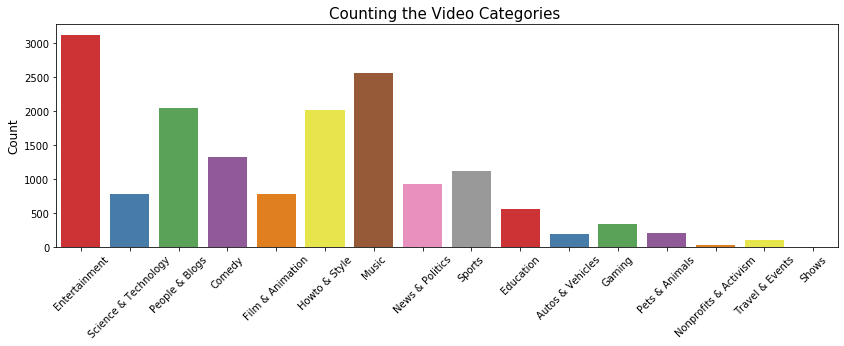

In [26]:
print("Category Name count")
print(videos_df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=videos_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

### Category level distribution of views, likes, dislikes, comments

#### Category level distribution of views

Category Name count
Entertainment     3114
Music             2547
People & Blogs    2035
Howto & Style     2013
Comedy            1312
Name: category_name, dtype: int64


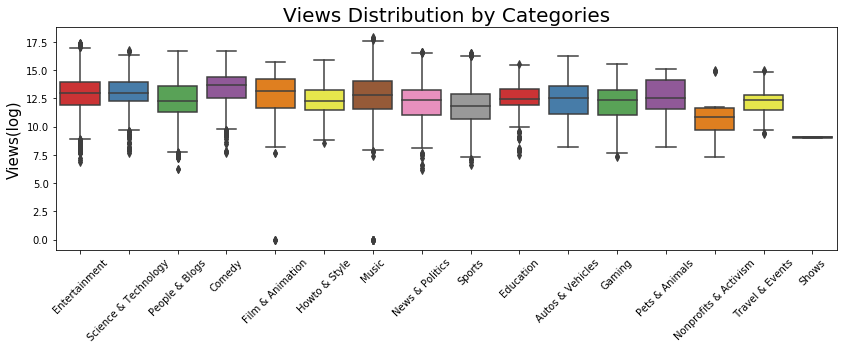

In [27]:
print("Category Name count")
print(videos_df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=videos_df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribution by Categories", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.show()

#### Category level distribution of like counts

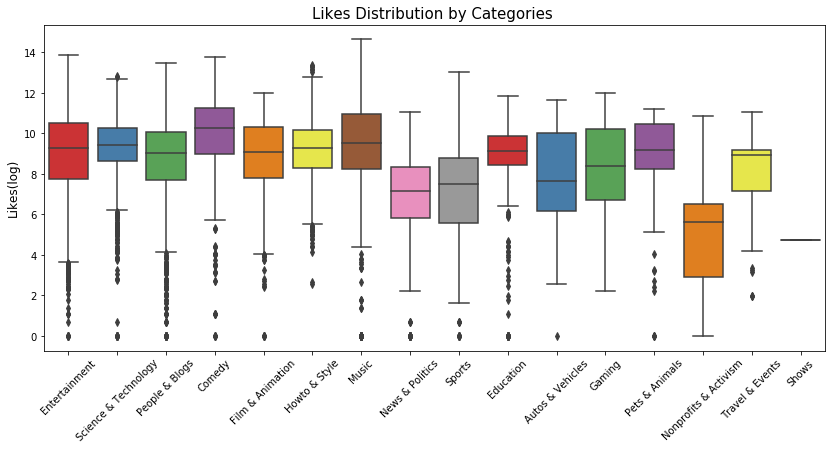

In [28]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=videos_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribution by Categories ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

#### Category level distribution of dislike counts

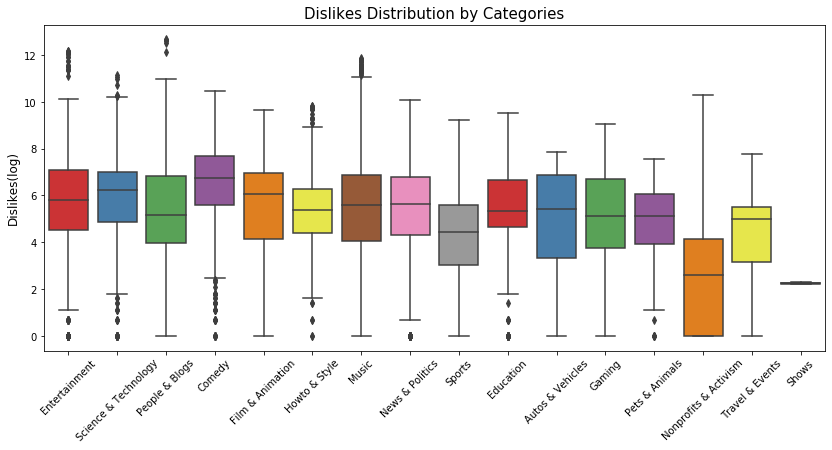

In [29]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=videos_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribution by Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

#### Category level distribution of comment counts

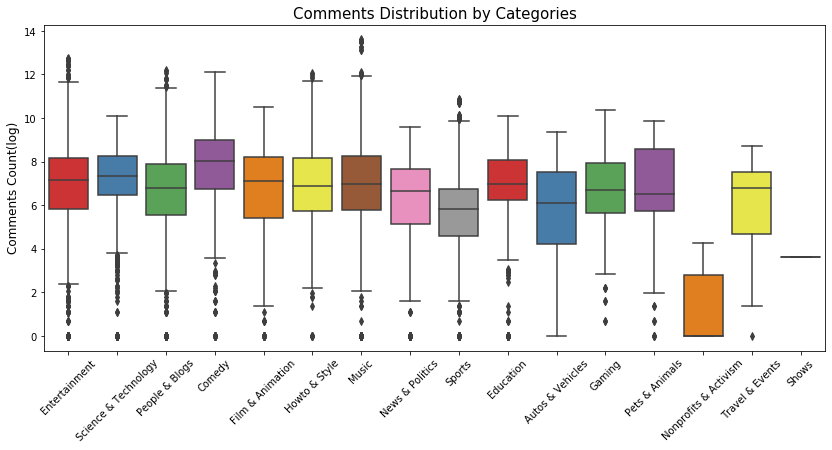

In [30]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=videos_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribution by Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

### What percentage of viewers left a like/dislike/comment?

#### Create new attributes like_rate, dislike_rate, comment_rate

In [31]:
videos_df['like_rate'] =  videos_df ['likes'] / videos_df['views'] * 100
videos_df['dislike_rate'] =  videos_df ['dislikes'] / videos_df['views'] * 100
videos_df['comment_rate'] =  videos_df ['comment_total'] / videos_df['views'] * 100

#### Visualize

C:\Users\legin\Miniconda3\envs\nlp-ds\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\legin\Miniconda3\envs\nlp-ds\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


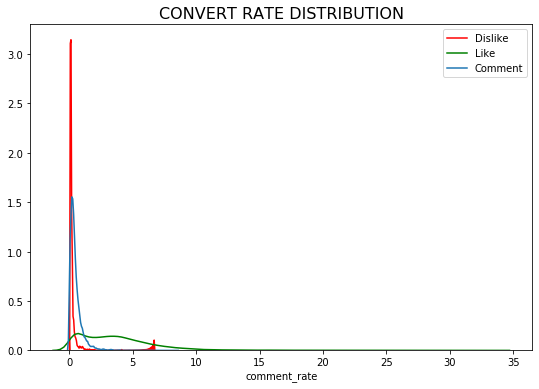

In [32]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(videos_df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(videos_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(videos_df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUTION', fontsize=16)
plt.legend()
plt.show()

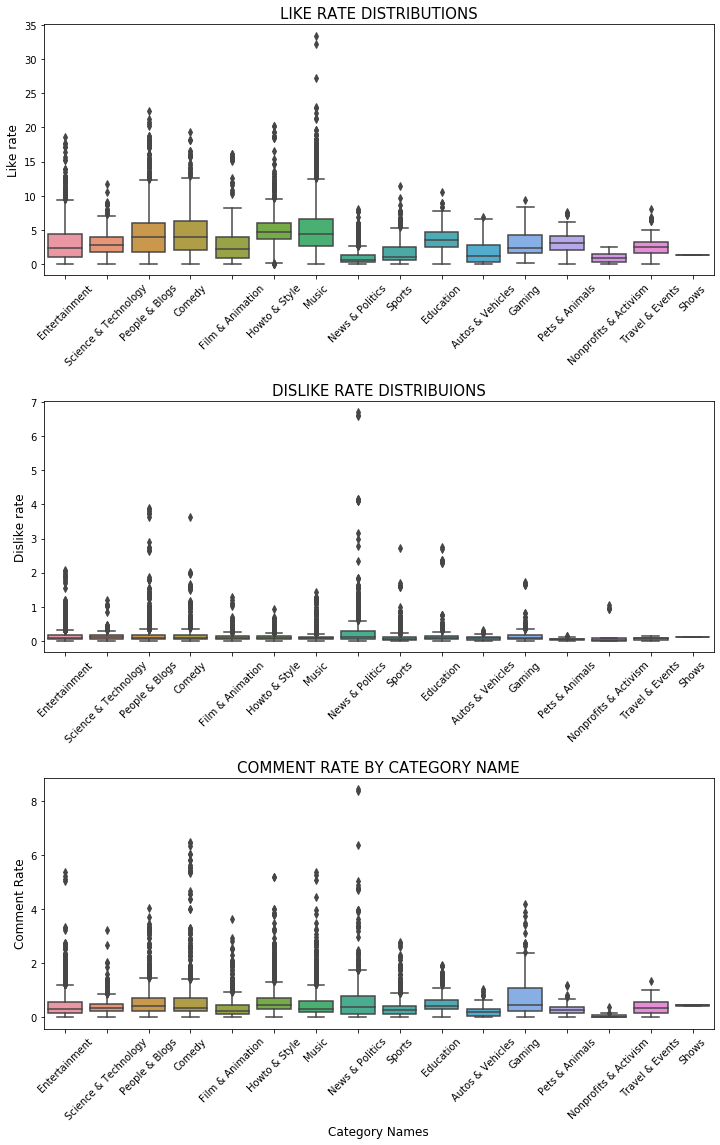

In [33]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=videos_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUTIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=videos_df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=videos_df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

### Analysing the Correlation Matrix of the numerical variables

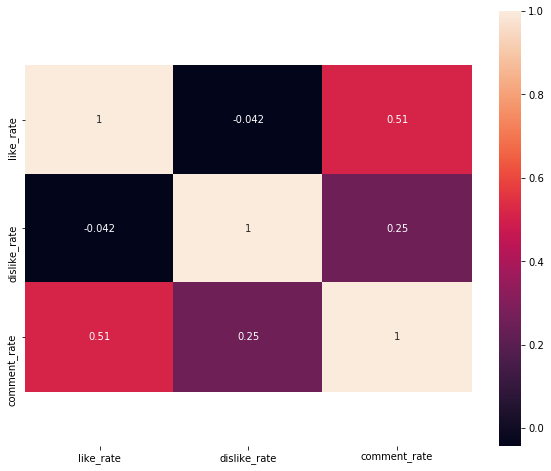

In [34]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(videos_df[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) # bugfix
plt.show()

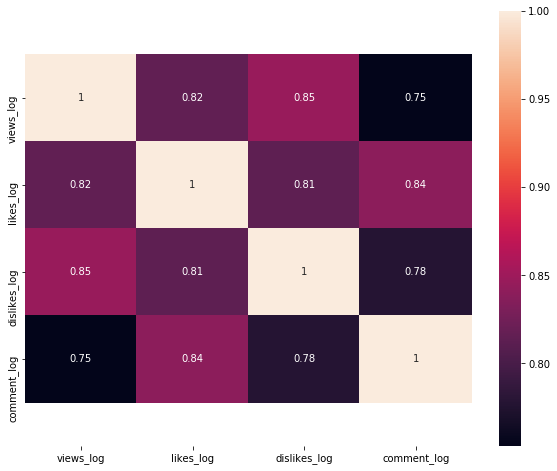

In [35]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(videos_df[['views_log', 'likes_log', 'dislikes_log', 'comment_log']].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5) # bugfix
plt.show()